# EDA ve Lineer Regresyon

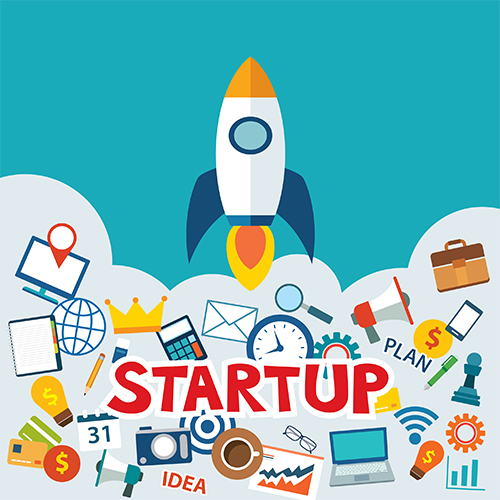

50 adet Startup'ın **araştırma ve geliştirmeye yönelik harcaması**, **yönetime yönelik harcaması**, **pazarlama harcaması**, **kazandıkları kar miktarı** ve **kuruldukları lokasyon** bilgisi bulunmaktadır. Amaç kar miktarını tahmin etmektir. Bu bir sayısal tahmin problemidir ve bağımlı değişkenimiz "Profit".

Numpy, matplotlib.pyplot, pandas ve seaborn kütüphanelerini çekirdeğe dahil edelim.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Dizinde bulunan veri çerçevemizi startups değişkenine atayalım. startups değişkenini df değişkenine kopyalayarak kullanmaya başlayalım.

In [ ]:
startups = pd.read_csv("../input/50startups/50Startups.csv")
df = startups.copy()

In [ ]:
df

İlk 5 gözlemini yazdıralım.

In [ ]:
df.head()

Veri çerçevesinin bilgilerini görüntüleyelim.

In [ ]:
df.info()

Kaç gözlem ve öznitelikten oluştuğunu görüntüleyelim.

In [ ]:
df.shape

Eksik verileri kontrol edelim.

In [ ]:
df.isna().sum()

Korelasyon matrisi çizdirelim.

In [ ]:
corr = df.corr()
corr

Seaborn ile korelasyon matrisinin ısı haritasını çizdirelim.

In [ ]:
plt.subplots(figsize=(20,8))
corr = df.corr()
sns.heatmap(corr,annot = True,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values);
plt.show()

R&D Spend ve Profit arasındaki korelasyonu daha iyi görebilmek için scatterplot çizdirelim.

In [ ]:
import plotly.express as px

fig = px.scatter(df, x = "R&D Spend", y = "Profit", color = "R&D Spend")

fig.update_layout(title={'text': "R&D Spend - Profit Scatter Plot"})

fig.show()

In [ ]:
fig = px.scatter(df, x = "R&D Spend", y = "Profit", color = "R&D Spend", trendline="ols")

fig.update_layout(title={'text': "RdSpend-Profit Regression Plot"})

fig.show()

Sayısal değişkenlerin dağılımını görmek için df üzerinden histogram çizdirelim.

In [ ]:
df.hist(figsize = (18,18))
plt.show()

Veri çerçevesinin temel istatistik değerlerini görüntüleyelim.

In [ ]:
df.describe().T

State'a ait benzersiz değerleri görüntüleyelim.

In [ ]:
df.State.unique()

get_dummies yardımıyla State'a dair kategorik öznitelik çıkarımlarında bulunalım. Çünkü State'ların birbirine üstünlüğü yok, nominaller. Ordinal değil.

In [ ]:
df["State"] = pd.Categorical(df["State"])
dfDummies = pd.get_dummies(df["State"], prefix="state")

In [ ]:
dfDummies.head()

In [ ]:
df = pd.concat([df, dfDummies], axis=1)

In [ ]:
df.head()

State özniteliğini silip dummy olarak yaratılan State'lardan da birisini hariç tutarak veri çerçevemizi güncelleyelim.

In [ ]:
df =df.drop(columns ="State")
df =df.drop(columns ="state_California")

In [ ]:
df.head()

Veri çerçevemizi bağımlı ve bağımsız değişkenler olmak üzere bölütleyelim.

In [ ]:
x = df.drop("Profit",axis = 1)
y = df["Profit"]

Bağımlı ve bağımsız değişkenleri kontrol edelim.

In [ ]:
x.head()

In [ ]:
y.head()

Bu bağımlı ve bağımsız değişkenlerden train ve test olmak üzere 4 parça oluşturalım. Bunu yapmak için train_test_split kullanalım.

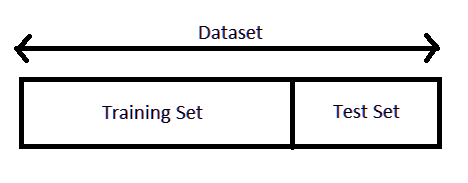

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

4 parça değişkeni kontrol edelim.

In [ ]:
x_train.info()

In [ ]:
x_test.info()

In [ ]:
y_train.head()

In [ ]:
y_test.head()

LinearRegression'u çekirdeğe dahil edip modeli inşa edelim.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

Modeli eğitmek için bağımlı bağımsız değişkenlerden oluşturulan eğitim verilerini verelim.

In [ ]:
model.fit(x_train, y_train)

Modele daha önce görmediği bağımlı test değişkenini tahmin ettirelim. Bu tahmin değerlerimizi y_pred değişkenine atayalım.

In [ ]:
y_pred = model.predict(x_test)

Tahminleri ve gerçek değerleri bir veri çerçevesinde toplayıp üzerinde göz gezdirelim.

In [ ]:
dfPredict = pd.DataFrame({"Gercek Degerler" : y_test, "Tahmin Edilen Degerler" : y_pred})

dfPredict

Tahminlerimizin başırısını daha iyi görebilmek için predFark değişkeni oluşturup bu değişkene y_pred ve Profit farkını atayalım.

In [ ]:
dfPredict = pd.DataFrame({"Gercek Degerler" : y_test, "Tahmin Edilen Degerler" : y_pred, "Gerçek ile Tahmin Arasindaki Fark":y_pred - y_test})

dfPredict

Sklearn bünyesinde barınan metrics'i çekirdeğe dahil edelim ve MAE, MSE, RMSE değerlerini görüntüleyelim.

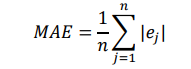

In [ ]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)

print("Ortalama Mutlak Hata (Mean Absolute Error):", MAE)

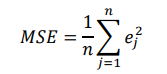

In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)

print("Ortalama Kare Hata (Mean Squared Error):", MSE)

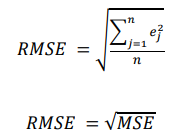

In [ ]:
import math

RMSE = math.sqrt(MSE)

print("Kök Ortalama Kare Hata (Root Mean Square Error):", RMSE)

Modelin R Squared değerini eğitim verileri üzerinden yazdıralım.

In [ ]:
model.score(x_train, y_train)

Statsmodel kullanarak hangi özniteliklerin model için %95 güvenilirlikle ne kadar anlamlı olup olmadığına da bakabilir. Modelde bazı feature selection işlemleri yaparak tekrardan eğitip yeni sonuçlar mukayese edilebilir.

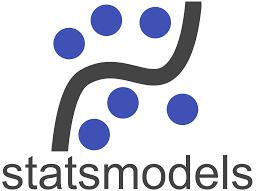

**OLS (Ordinary Least Squared):** Sıradan en küçük kareler yöntemidir. Doğrusal regresyon modeli kurulurken verilerin ortasından geçen eğime (çizgiye) en az kare farkı ile yaklaşmaya çalışan bir yöntemdir.

In [ ]:
import statsmodels.api as sm

stmodel = sm.OLS(y, x).fit()

**R-Squared (R2):** Verilerin yerleştirilmiş regresyon çizgisine ne kadar yakın olduğunun istatistiksel bir ölçüsüdür. Bizim tablomuzda bu değer 0.98 olup görece iyi bir sonuç diyebiliriz. **Sosyal bilimler için 0.70 üzeri ve doğa bilimleri için ise değişkenlik göstermekte olup 0.60 üzeri kabul edilebilir bir başarı ölçütü** sayılabilir.

**Adjusted (Düzenlenmiş) R-Squared:** Bu değer genellikle çoklu regresyon analizinde kullanılır. Modele değişken eklendikçe R2 değeri değişkeni etkili varsayıp varyansını açıkladığını sanabilir. Ancak düzenlenmiş R2 mantığında her bir değişkenin bağımlı değişken üzerindeki etkisi ölçülerek daha optimum sonuçlar vermektedir. Tabloyu yorumlarken bu iki değerin birbirine yakın çıkması önemli bir konudur. Bu çıktının anlamak için şöyle bir örnek verilebilir. Örneğin bir evin hem brüt hem de net metrekaresi bulunur. Brüt metrekare her şeyi içine dahil ederken net ise sadece yaşam alanına odaklanır. Dolayısı ile ev bakarken bu ikisi arasındaki farkı bilmek önemlidir. Model sonucunu incelerken de bu alana bakılması önemlidir.

**Coefficients (Katsayılar):** Regresyon katsayısı, iki veya daha fazla değişken arasındaki ortalama fonksiyonel ilişkinin istatistiksel bir ölçüsüdür. Regresyon tahmin yaparken buradaki katsayılardan yararlanır. Formül; Y(tahmin edilecek değer) = X * m + b . 

**P-Value:** Bu değer bize bağımsız değişkenden çıkan katsayının istatistiksel olarak anlamlı olup olmadığını vermektedir. Bilim dünyasında genel olarak kabul edilen **anlamlılık değeri x<0.05**'dir. Eğer bu değerin üzerinde bir sonuç çıkıyorsa ilgili bağımsız değişkenin modele etkisi anlamlı değildir. Bu değer, çok değişkenli regresyon analizinde değişkenlerin seçimi sırasında kullanılmaktadır.

In [ ]:
stmodel.summary()

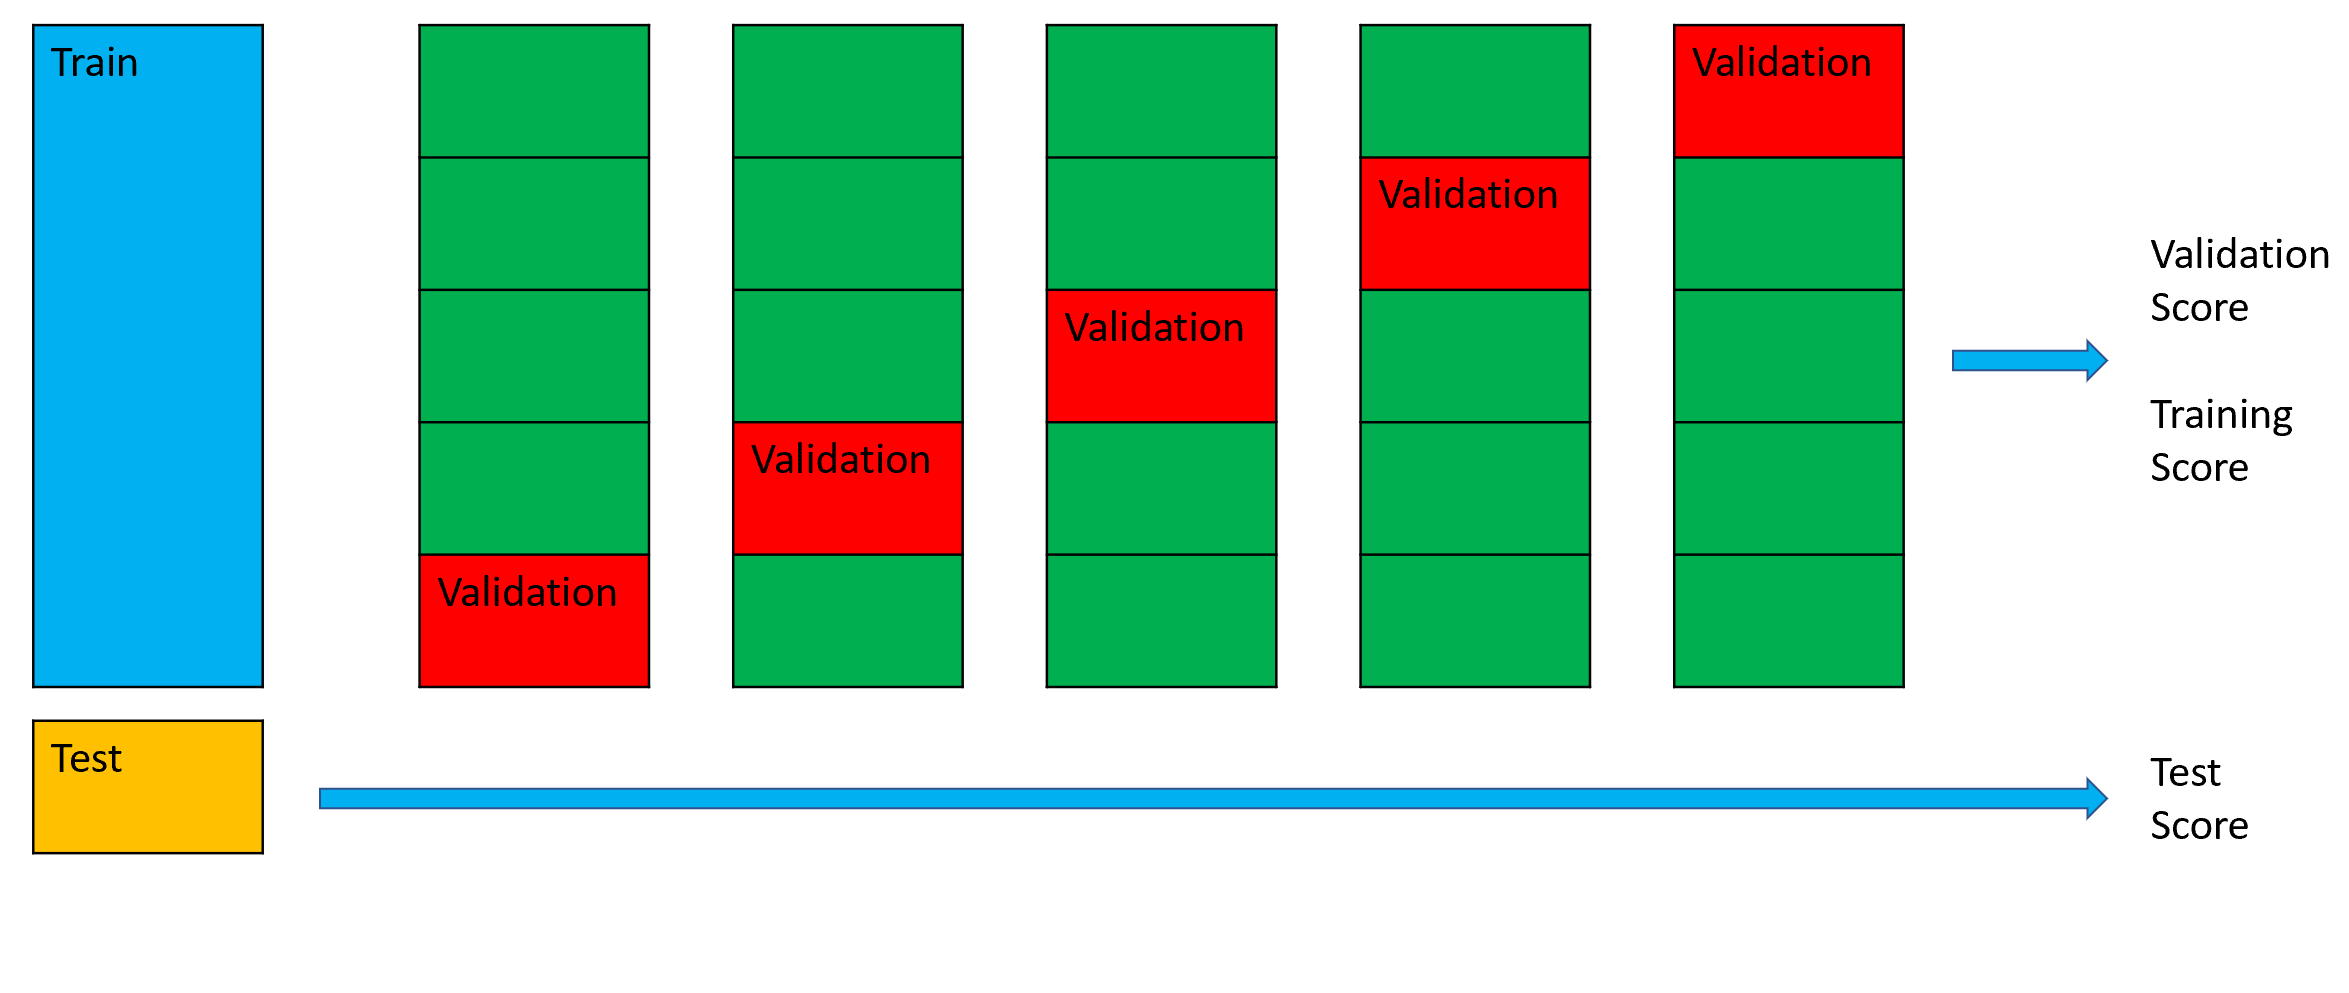

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
crosValScore = cross_val_score(model, x_train, y_train, cv = 10, scoring = "r2")
crosValScore

In [ ]:
crosValScore.mean()